<a href="https://colab.research.google.com/github/AMR-21/Magic-Gamma-Telescope-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data Initialization

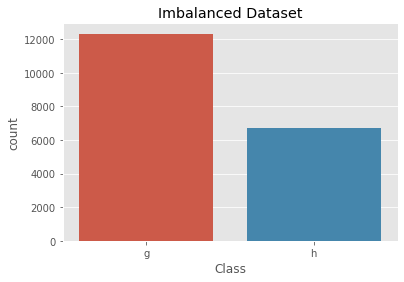

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [86]:
names= ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
'class']

imbalancedDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=names)


X = imbalancedDataset.drop(columns=['class'])
Y = imbalancedDataset['class']

plot = sns.countplot(x=Y)
plt.title('Imbalanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())
imbalancedDataset

# Data Balancing

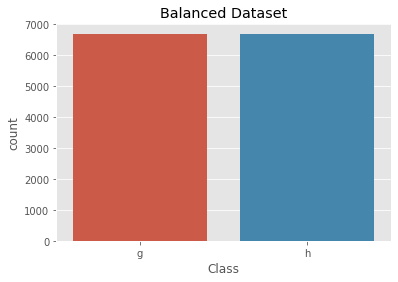

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
1,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
2,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
3,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
4,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [87]:
# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X,Y = under_sampler.fit_resample(X,Y)

plot = sns.countplot(x=Y)
plt.title('Balanced Dataset')
plt.xlabel('Class')
plt.show()
print(Y.value_counts())

balanced = X.copy()
balanced['class'] = Y
balanced

# Data Splitting

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7001,stratify=Y)

print("Training set")
print(y_train.value_counts())

training = X_train.copy()
training['class'] = y_train

training


Training set
g    4682
h    4682
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
2230,52.7350,12.6817,2.6561,0.5563,0.3609,-64.5213,32.0105,11.6103,8.9282,277.7660,g
936,31.0413,19.4515,2.5514,0.3567,0.1868,28.9086,21.7073,-11.5324,14.1110,158.6190,g
10254,13.0287,10.9544,2.2000,0.7571,0.4511,-14.0985,5.7807,-10.1748,64.8700,182.9800,h
7366,13.9498,11.2494,2.4374,0.7756,0.4960,-1.2467,-6.5713,-9.7086,30.9788,228.6092,h
11772,113.8460,62.3167,3.3555,0.2258,0.1378,-127.3990,-104.4700,-11.5904,46.6340,345.8110,h
...,...,...,...,...,...,...,...,...,...,...,...
2118,37.6527,16.8221,2.7771,0.2723,0.1429,-19.1202,20.2691,-6.7910,74.6315,144.1180,g
13240,69.6201,15.3341,3.0025,0.2558,0.1297,-27.6623,39.8036,2.9768,85.3206,241.3393,h
11434,26.5390,13.4578,2.3459,0.4632,0.2863,30.5471,14.9775,-11.5298,15.4927,145.0760,h
1112,84.0827,55.4775,4.2314,0.0691,0.0346,-17.1936,85.0995,38.3377,2.4680,179.6060,g


# Tuning and Cross-Validation

In [89]:
def tuneModel(model,param): 
  gscv = GridSearchCV(model, param, cv=StratifiedKFold(n_splits=10))
  gscv.fit(X_train, y_train)

  fig,ax= plt.subplots()
  plt.style.use('ggplot')
  ax.plot(tuple(param.values())[0],gscv.cv_results_['mean_test_score']);
  ax.set_title('Cross-Validation plot')
  ax.set_xlabel(tuple(param.keys())[0])
  ax.set_ylabel('mean accuarcy');
  return gscv.best_estimator_,gscv.best_params_,gscv.best_score_

# Classifiers

In [7]:
def analyze(pred):
  print('Accuracy: ',accuracy_score(y_test, pred)*100 ,"%")
  print(classification_report(y_test, pred))


  fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_test, pred), figsize=(4, 4), cmap=plt.cm.Blues)
  ax.set_xticklabels(['', 'g', 'h'])
  ax.set_yticklabels(['', 'g', 'h']);
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


### Decision Tree

Accuracy:  80.20937188434696 %
              precision    recall  f1-score   support

           g       0.81      0.80      0.80      2006
           h       0.80      0.81      0.80      2006

    accuracy                           0.80      4012
   macro avg       0.80      0.80      0.80      4012
weighted avg       0.80      0.80      0.80      4012



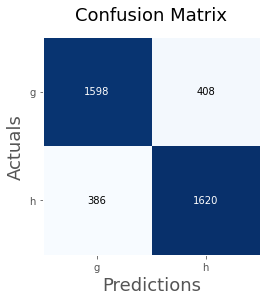

In [68]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

analyze(dt_pred)


### AdaBoost

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 20 then from 100 to 320 with step of 10 then from 280 to 300 with step 1
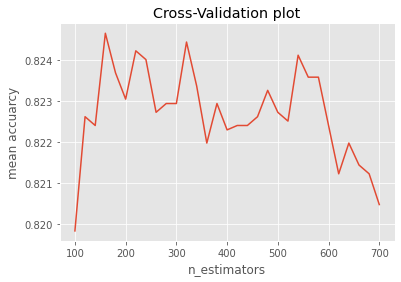 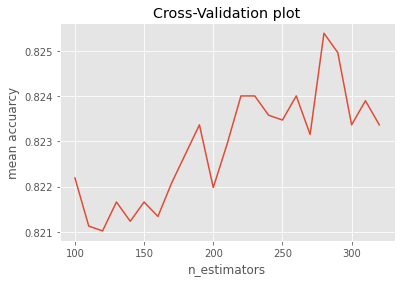
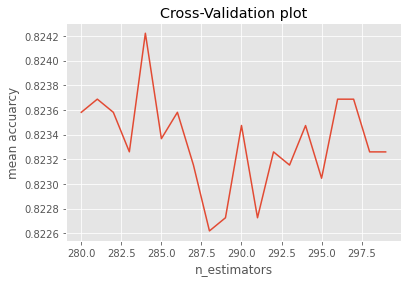

AdaBoostClassifier(n_estimators=284) 0.8242215791442045 

Accuracy:  82.57726819541375 %
              precision    recall  f1-score   support

           g       0.81      0.85      0.83      2006
           h       0.84      0.80      0.82      2006

    accuracy                           0.83      4012
   macro avg       0.83      0.83      0.83      4012
weighted avg       0.83      0.83      0.83      4012



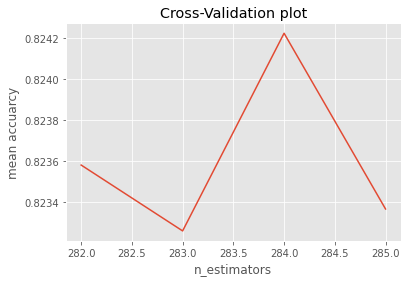

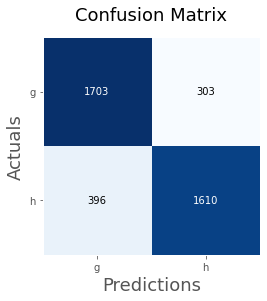

In [62]:
AdaBoostTune = AdaBoostClassifier()
estimators = np.arange(282,286,1)
AdaBoost,best_params,best_score = tuneModel(AdaBoostTune,{"n_estimators":estimators})

AdaBoost.fit(X_train, y_train)
ad_pred = AdaBoost.predict(X_test)
print(AdaBoost,best_score,"\n")

analyze(ad_pred)


### K-NN

KNeighborsClassifier(n_neighbors=15) 0.7660169754353319 

Accuracy:  76.8444666001994 %
              precision    recall  f1-score   support

           g       0.73      0.84      0.78      2006
           h       0.82      0.69      0.75      2006

    accuracy                           0.77      4012
   macro avg       0.77      0.77      0.77      4012
weighted avg       0.77      0.77      0.77      4012



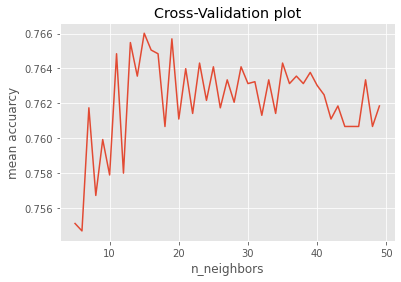

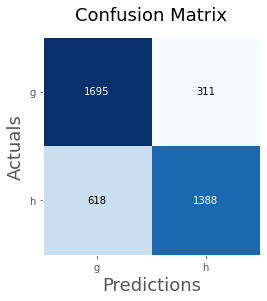

In [69]:
knnTune = KNeighborsClassifier()
k = np.arange(5, 50, 1)
knn,best_params,best_score = tuneModel(knnTune,{"n_neighbors":k})

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn,best_score,"\n")

analyze(knn_pred)

### Random Forests

#### Estimating value for n_estimators hyperparameter starting from 100 up to 700 with step of 20 then from 500 to 600 with step of 10 then from 579 to 581 with step 1
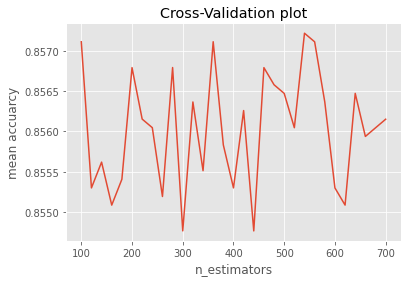 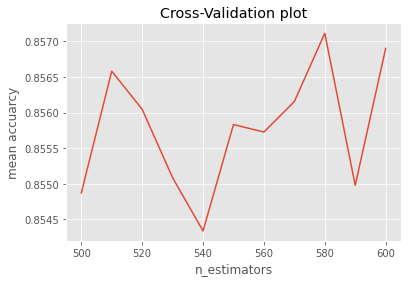

RandomForestClassifier(n_estimators=579) 0.8570054456393837 

Accuracy:  87.03888334995014 %
              precision    recall  f1-score   support

           g       0.86      0.89      0.87      2006
           h       0.88      0.85      0.87      2006

    accuracy                           0.87      4012
   macro avg       0.87      0.87      0.87      4012
weighted avg       0.87      0.87      0.87      4012



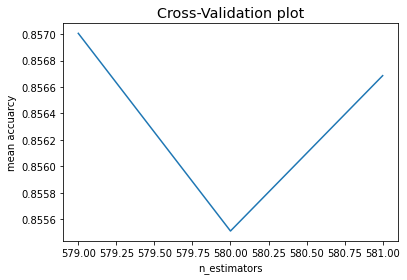

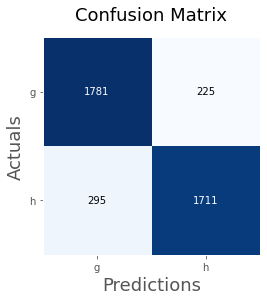

In [8]:
rfTune = RandomForestClassifier()
restimators = np.arange(579,582,1)
rf,best_params,best_score = tuneModel(rfTune,{"n_estimators":restimators})

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf,best_score,"\n")

analyze(rf_pred)

### Naive Bayes

Accuracy:  65.40378863409771 %
              precision    recall  f1-score   support

           g       0.60      0.90      0.72      2006
           h       0.80      0.41      0.54      2006

    accuracy                           0.65      4012
   macro avg       0.70      0.65      0.63      4012
weighted avg       0.70      0.65      0.63      4012



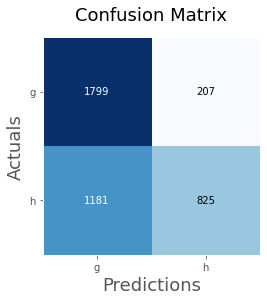

In [100]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

analyze(nb_pred)
